# Algorithmic Differentiation Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np

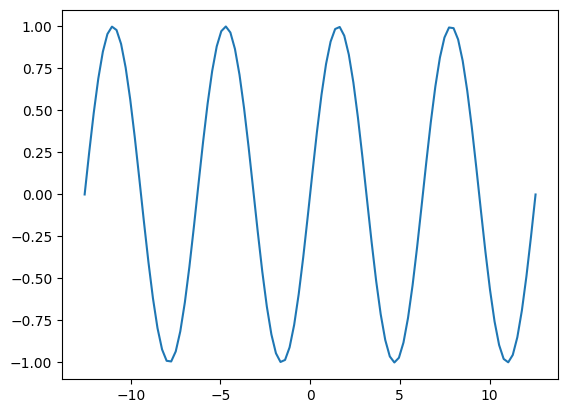

In [2]:
plt.plot(np.linspace(-4*np.pi,4*np.pi,100),np.sin(np.linspace(-4*np.pi,4*np.pi,100)))

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# from torchvision import datasets
# from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch.utils.tensorboard import SummaryWriter

In [11]:

class DenseModel(nn.Module):
    def __init__(self, num_inputs, num_hidden_layers, num_neurons_per_hidden_layer, dtype=torch.float64):
        super().__init__()

        layers = []
        in_features = num_inputs

        for _ in range(num_hidden_layers):
            layers.append(nn.Linear(in_features, num_neurons_per_hidden_layer, dtype=dtype))
            layers.append(nn.Softplus())
            in_features = num_neurons_per_hidden_layer

        layers.append(nn.Linear(in_features, 1, dtype=dtype))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


In [12]:
class DiffDeepLearning(nn.Module):
    def __init__(self, model):
        super(DiffDeepLearning, self).__init__()
        
        self.model = model

    def forward(self, x):

        y = self.model(x)
        grad = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y))[0]

        return torch.concatenate([y, grad], dim=1)


tensor([[ 8.2071e-01,  4.5350e-04, -1.2633e-02,  9.7705e-03, -3.8564e-03,
         -1.4336e-05],
        [ 8.2145e-01,  6.3729e-05, -1.2883e-02,  1.0439e-02, -4.2763e-03,
          5.9917e-04],
        [ 8.1659e-01, -4.1170e-04, -1.2053e-02,  9.7527e-03, -3.7065e-03,
          5.1996e-04],
        [ 8.1216e-01, -1.1642e-03, -1.0863e-02,  1.0064e-02, -4.4777e-03,
          1.0117e-03],
        [ 8.1696e-01,  3.4960e-04, -1.3605e-02,  1.0257e-02, -4.0194e-03,
         -4.1013e-04],
        [ 8.1249e-01,  8.4256e-04, -1.3599e-02,  1.0118e-02, -3.5136e-03,
         -1.2691e-03],
        [ 8.0729e-01, -1.9080e-03, -1.1290e-02,  1.0693e-02, -4.4123e-03,
          1.5321e-03],
        [ 8.1360e-01,  1.0222e-03, -1.4411e-02,  9.9901e-03, -3.0848e-03,
         -1.5726e-03],
        [ 8.0889e-01, -2.2231e-03, -1.1408e-02,  1.0140e-02, -4.0469e-03,
          1.5483e-03],
        [ 8.2255e-01, -3.3444e-04, -1.2694e-02,  9.9967e-03, -4.0419e-03,
          8.6482e-04]], dtype=torch.float64, grad_fn=

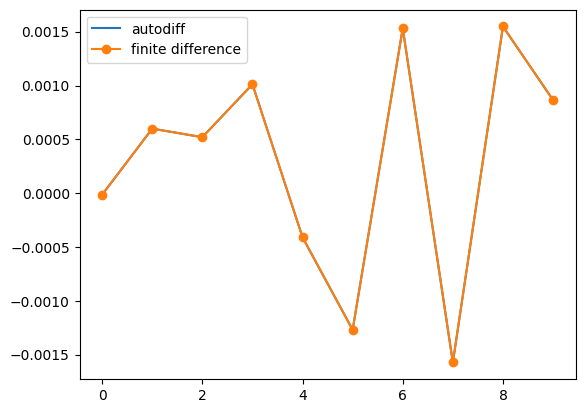

In [13]:
model = DenseModel(num_inputs=5, num_hidden_layers=3, num_neurons_per_hidden_layer=64)

algdiffmodel = DiffDeepLearning(model)


x = torch.rand(10, 5, dtype=torch.float64, requires_grad=True)

y = algdiffmodel(x)

print(y)

col = 4
ep = 1e-6

x__ = x.clone()

x__[:, col] += torch.tensor(ep)

y2 = algdiffmodel(x__)

test = (y2[:, 0] - y[:, 0]) / ep

print(test)

plt.plot(y[:,col+1].detach().numpy(), label='autodiff')

plt.plot(test.detach().numpy(), label='finite difference', marker='o')

plt.legend()


In [14]:

print(algdiffmodel)


DiffDeepLearning(
  (model): DenseModel(
    (net): Sequential(
      (0): Linear(in_features=5, out_features=64, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Softplus(beta=1.0, threshold=20.0)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): Softplus(beta=1.0, threshold=20.0)
      (6): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)


In [8]:
class DiffLearningFullModel:

    def __init__(self, model, loss_fn, optimizer, train_dataloader, val_dataloader = None):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_dataloader = train_dataloader
        self.val_dataloader = val_dataloader

    def compute_normalization_params(self):

    def train(self, epochs, writer=None):
        for epoch in range(epochs):
            self.model.train()
            train_loss = 0.0
            for batch, (X, y) in enumerate(self.train_dataloader):
                X = X.requires_grad_(True)
                pred = self.model(X)
                loss = self.loss_fn(pred, y)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
            train_loss /= len(self.train_dataloader)

            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X, y in self.val_dataloader:
                    X = X.requires_grad_(True)
                    pred = self.model(X)
                    loss = self.loss_fn(pred, y)
                    val_loss += loss.item()
            val_loss /= len(self.val_dataloader)

            if writer:
                writer.add_scalar('Loss/train', train_loss, epoch)
                writer.add_scalar('Loss/val', val_loss, epoch)

            print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

IndentationError: expected an indented block after function definition on line 10 (514682896.py, line 12)

In [9]:
X = torch.rand(100, 5, dtype=torch.float64)

In [10]:
X.mean(dim=0)


tensor([0.4651, 0.5491, 0.5271, 0.5093, 0.4597], dtype=torch.float64)